In [1]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [2]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum, plot_cepstral_coefficients, plot_features
from biosonic.filter import mel_filterbank, log_filterbank, filter
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum, dominant_frequencies
from biosonic.handle import read_wav, batch_extract_features
from biosonic.compute.utils import extract_all_features

In [3]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 200
f2 = 2000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

In [4]:
from biosonic.compute.utils import hz_to_mel

hz_to_mel(200)

np.float64(652.1609413889511)

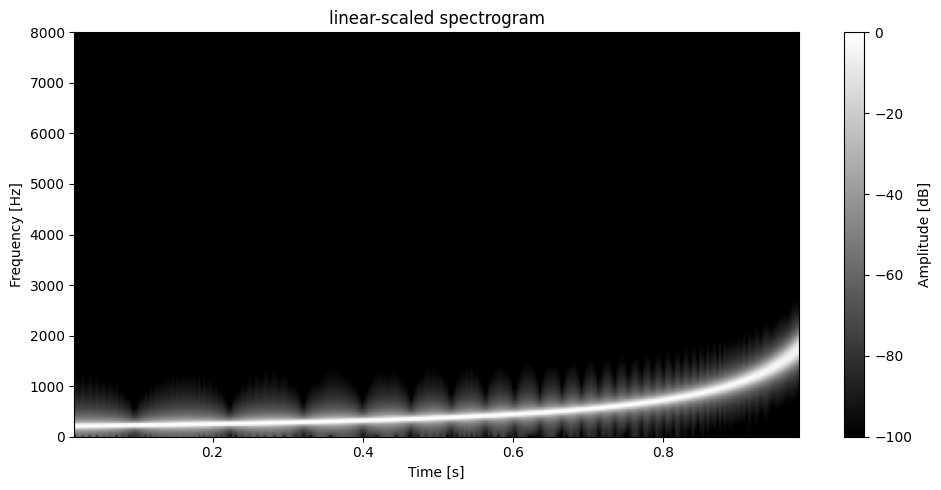

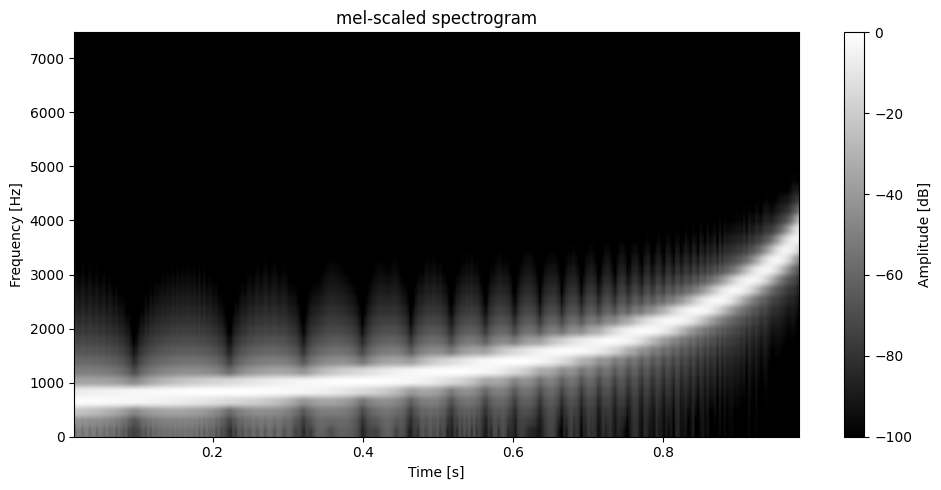

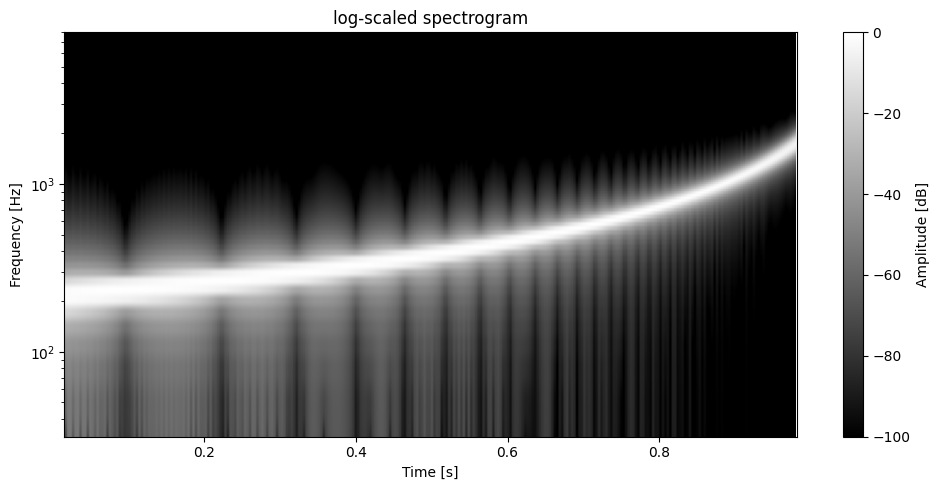

In [5]:
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', dynamic_range=100)
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="mel")
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="log", flim=(0,8000), n_bands=24)

In [6]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/code/WorkshpTim/bfsongrepo/gr41rd51/062012/gr41rd51__3part_SYLc_th4191_belowhits_200612_0707.4514.wav")

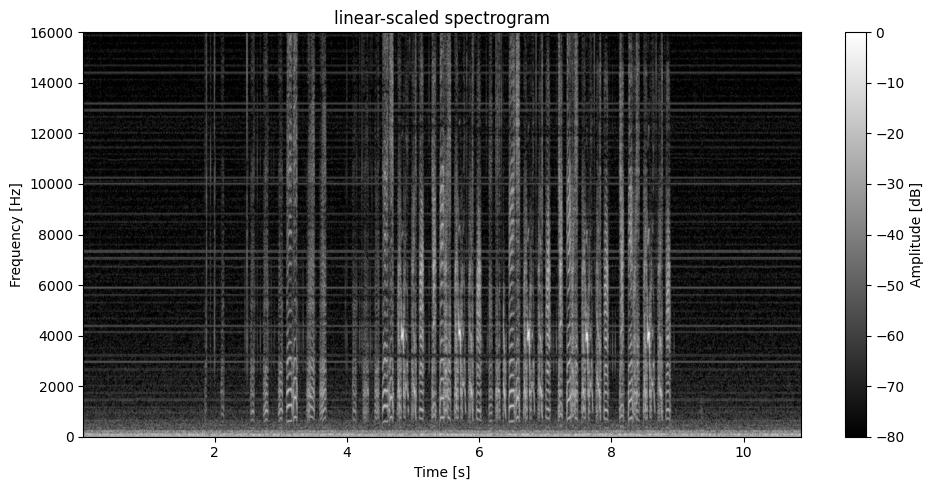

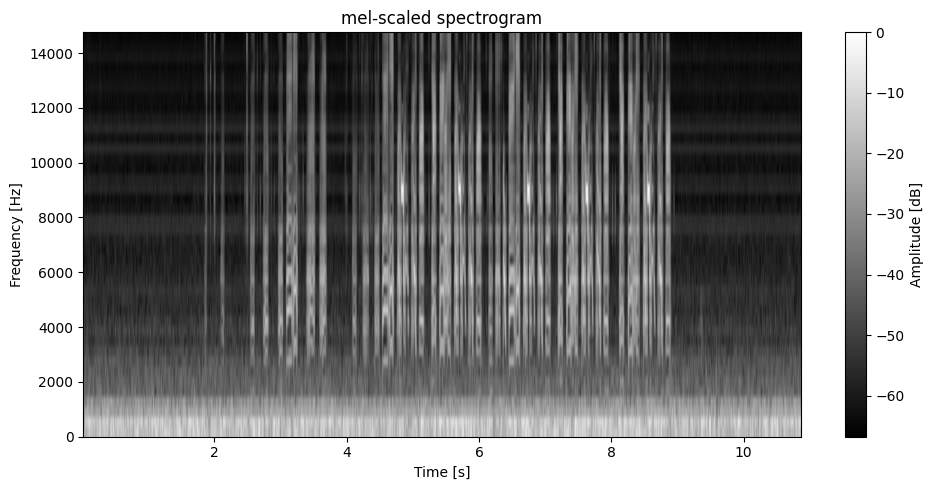

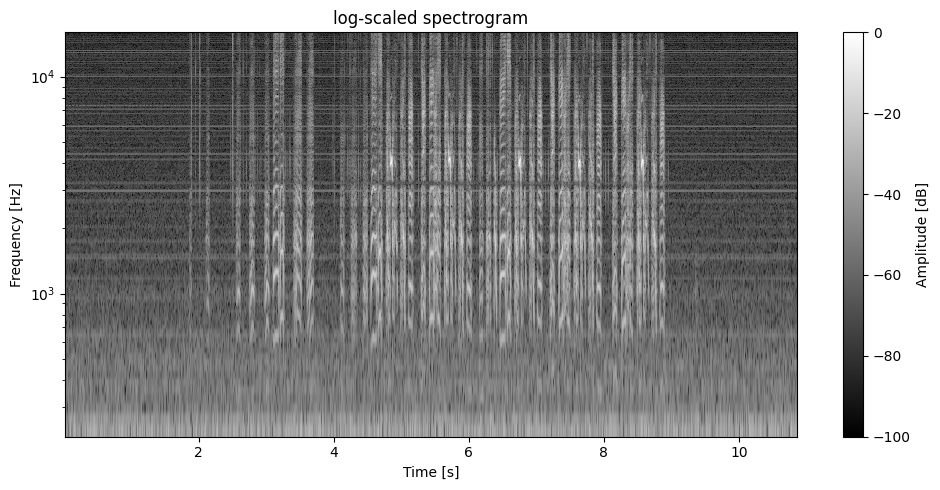

In [7]:
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', dynamic_range=80)
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="mel")
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="log", flim=(200, 20000), n_bands = 24)

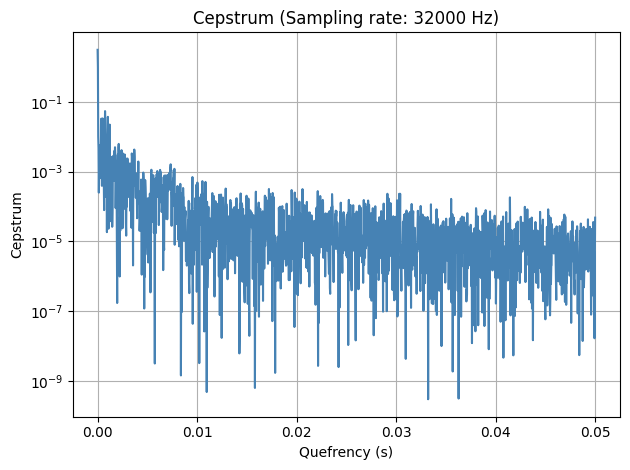

In [8]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
plot_cepstrum(signal_.data, signal_.sr)

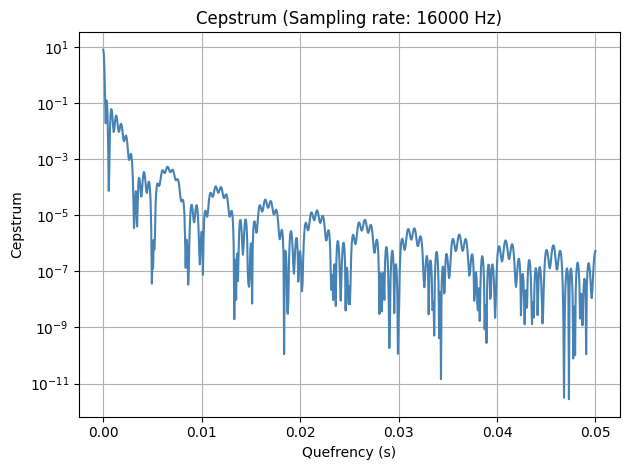

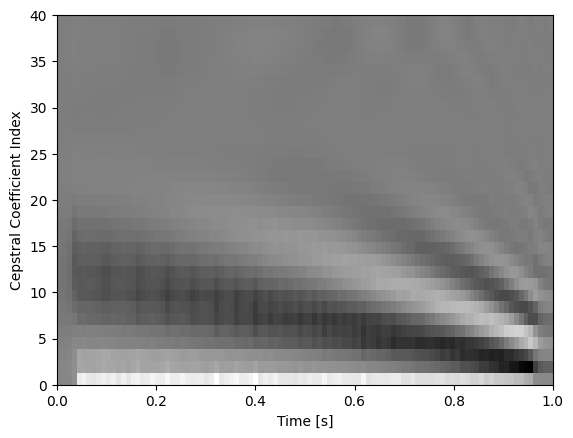

In [9]:
plot_cepstrum(x, sr)
plot_cepstral_coefficients(x, sr, n_fft)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/compute/pitch.py:385: RuntimeWarning: divide by zero encountered in divide
  sampled_autocorr = lag_domain / autocorr_hann


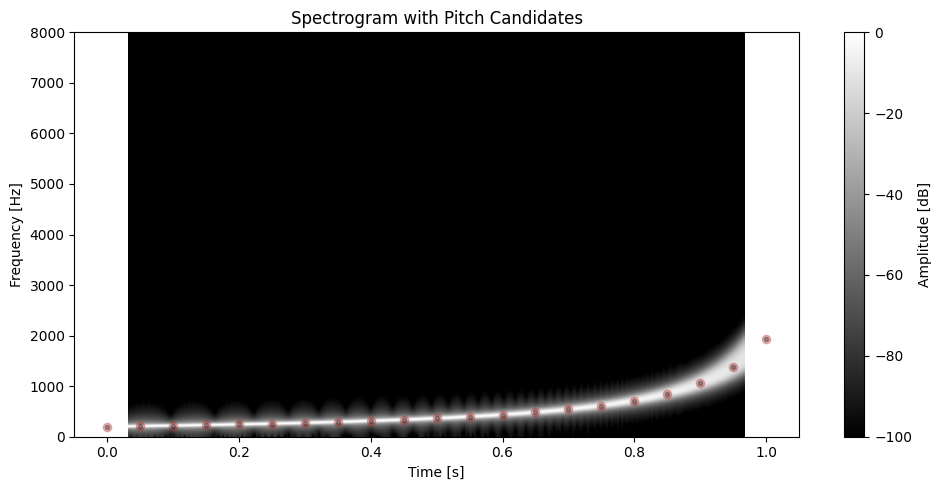

In [10]:
from biosonic.plot import plot_pitch_candidates, plot_pitch_on_spectrogram
from biosonic.compute.pitch import boersma, yin

# praat autocorrelation pitch tracking
time_points, candidates = boersma(x, sr, min_pitch=100, max_pitch=2100, voicing_thresh=.6, timestep=0.05)
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

# # yin method
# pitch_points = yin(x, sr, n_fft, 0.01, (100, 2000))
# time_points = np.arange(len(pitch_points)) * 0.01
# plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

In [11]:
# from biosonic.handle import batch_normalize_wav_files

# batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

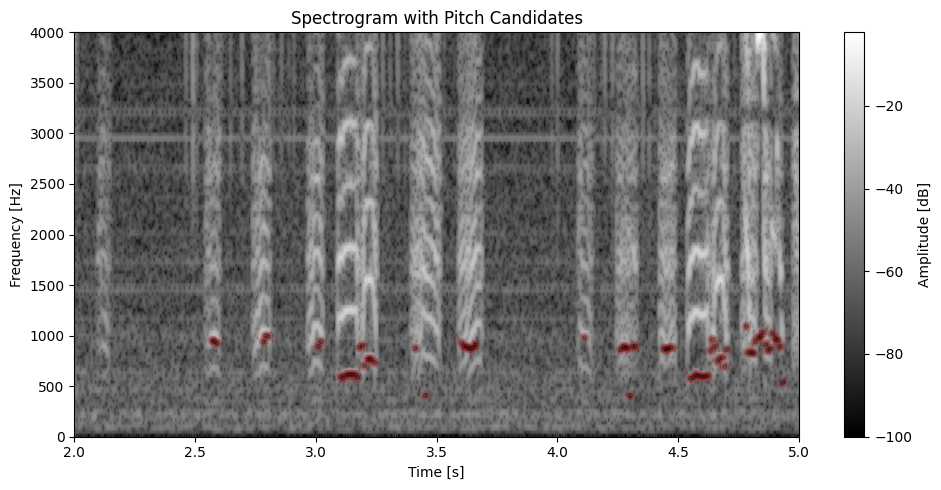

In [12]:
# Run pitch tracking
signal_.data = filter(signal_.data, signal_.sr, 500, type="highpass", order=1)
# autocorrelation
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=400, max_pitch=1500, voicing_thresh=0.1)
# Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,4000), tlim=(2,5))

# # yin method
# pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.001, (500, 1500), threshold=0.01)
# time_points = np.arange(len(pitch_points)) * 0.01
# plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,8000), tlim=(2,5))

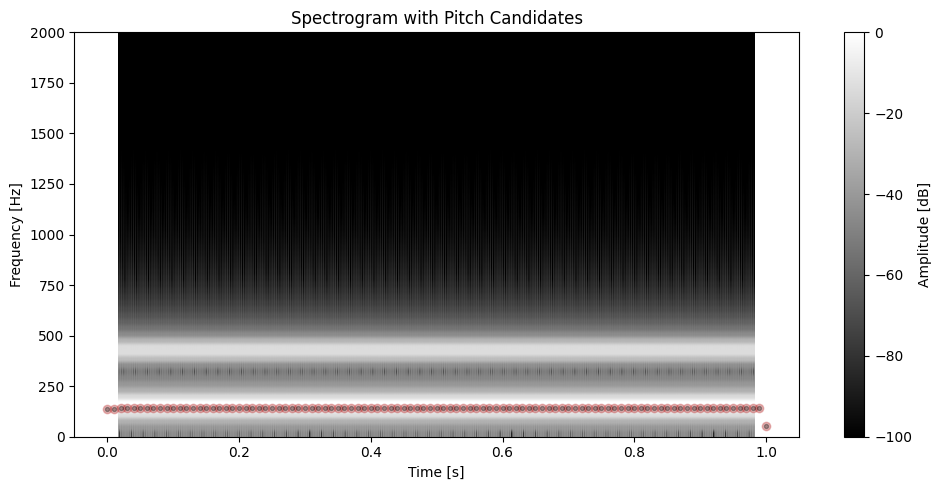

In [13]:
from biosonic.synthesize import amplitude_modulated

sr = 16000
n_fft = 512
time_points = np.linspace(0, 1, sr)
x = amplitude_modulated(time_points, 140, 280)

times, candidates = boersma(x, sr, min_pitch=50, max_pitch=600)
plot_pitch_on_spectrogram(x, sr, times, candidates, window_length=n_fft, overlap=95, flim=(0,2000))

# pitch_points = yin(x, sr, n_fft, 0.01, (100, 2000))
# time_points = np.arange(len(pitch_points)) * 0.01
# plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,2000))

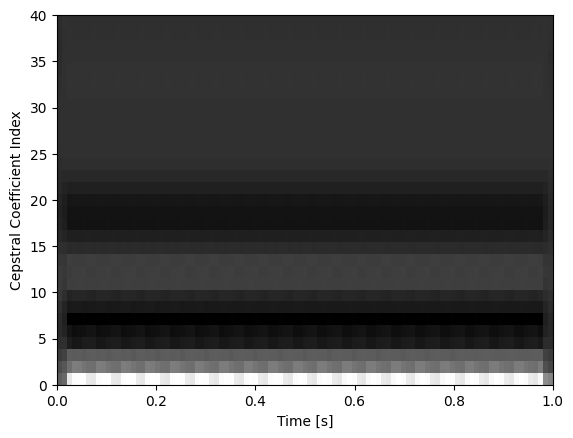

In [14]:
plot_cepstral_coefficients(x, sr, n_fft)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:104: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


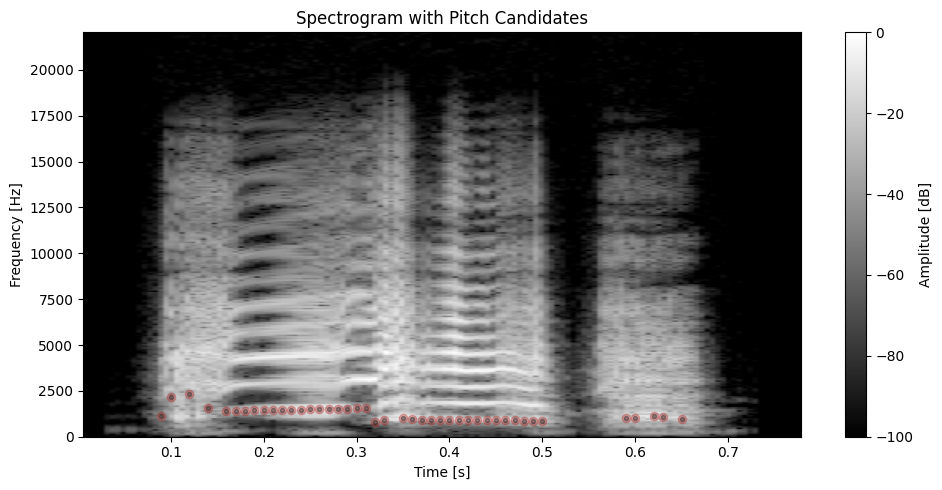

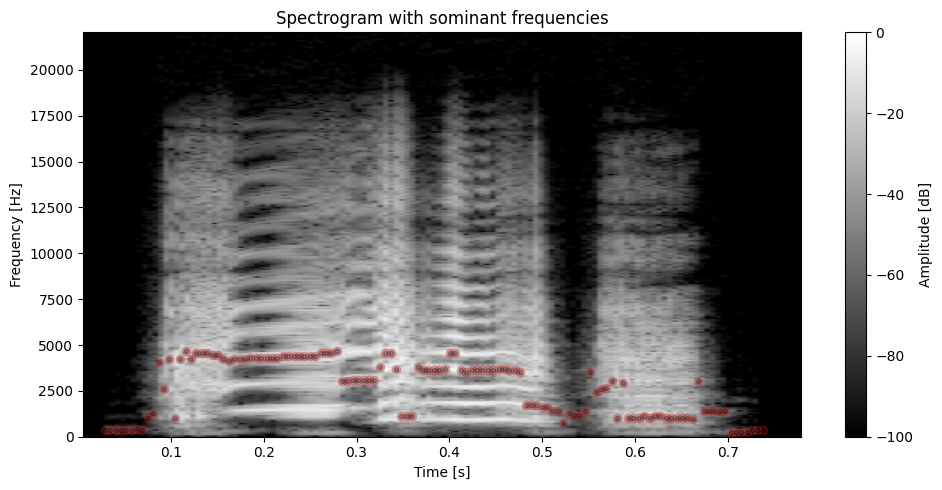

In [15]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/clips_from_selections/200_highpass/GT00211_G00908_Julian_distance.wav")
win_len = 512
overlap = 50
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=500, max_pitch=2500)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=win_len, overlap=overlap)

# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=overlap)
dom_freqs = dominant_frequencies(signal_.data, signal_.sr, n_freqs = 1, window_length=win_len, overlap=overlap)

dom_freqs = np.nan_to_num(dom_freqs)

# # yin method
# pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (500, 2500))
# time_points = np.arange(len(pitch_points)) * 0.01 
# plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=overlap)

# # Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, t, dom_freqs, window_length=win_len, overlap=overlap, title="Spectrogram with sominant frequencies")

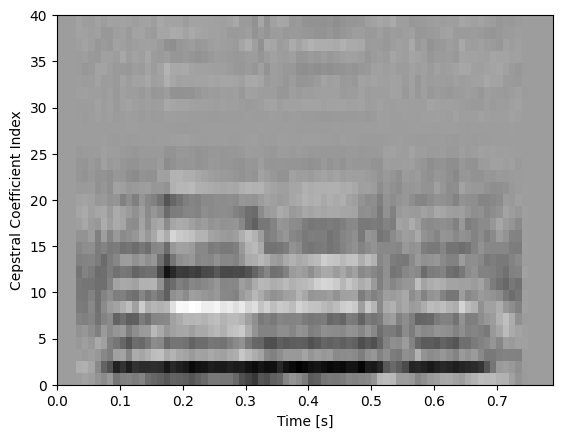

In [16]:
plot_cepstral_coefficients(signal_.data, signal_.sr, n_fft)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:303: RuntimeWarning: divide by zero encountered in log10
  spectrogram_db = 20 * np.log10(np.abs(spec))


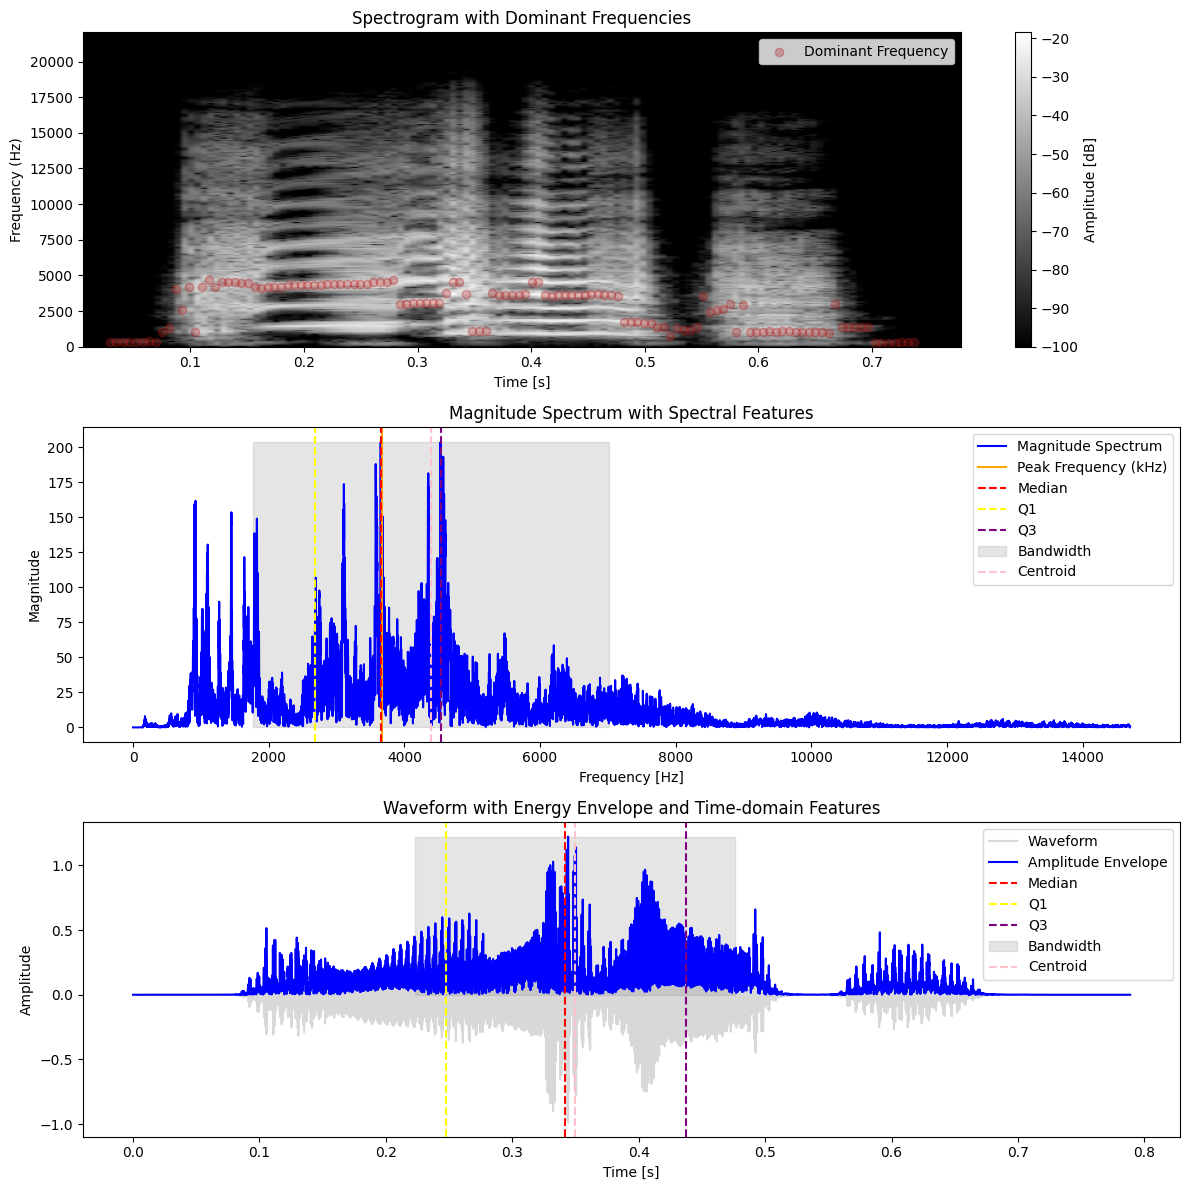

In [17]:
features = extract_all_features(signal_.data, signal_.sr)
plot_features(signal_.data, signal_.sr)

In [18]:
features

{'t_q1': 0.2472108843537415,
 't_median': 0.3418140589569161,
 't_q3': 0.43732426303854877,
 'temporal_centroid': np.float64(0.3498858195727226),
 'temporal_sd': 0.126491978764534,
 'temporal_skew': 2.0511105060577393,
 'temporal_kurtosis': 6.910249710083008,
 'amplitude_envelope': array([2.4457245e-07, 1.3555872e-07, 3.3347465e-07, ..., 2.6672060e-07,
        2.7988116e-07, 1.6845513e-07], shape=(34783,), dtype=float32),
 'duration': 0.7029478458049887,
 'fq_q1': np.float64(2689.1326222579996),
 'fq_median': np.float64(3652.706782048702),
 'fq_q3': np.float64(4533.869993962568),
 'spectral_flatness': np.float32(0.0015890924),
 'spectral_centroid': np.float64(4397.607078920699),
 'spectral_sd': np.float64(2623.100388907981),
 'spectral_skew': np.float64(1.402042338962974),
 'spectral_kurtosis': np.float64(6.020084137421188),
 'peak_frequency': 3665.385389414369,
 'spectrotemporal_entropy': 0.4952921531292712,
 'dominant_freqs': array([         nan,          nan,          nan,          

In [19]:
plt.close()